# Zajęcia 1 - wstęp do ML, KNN, cross-validation

## Ładowanie danych

Na początek zaimportujemy zbiór danych Iris, na którym będziemy pracować. Scikit-learn w Pythonie nazywa się sklearn (bo znak "-" nie może być w nazwie modułu).  
Sama funkcja load_iris() zwraca obiekt typu Bunch (podobne do słownika), który zawiera sporo danych, m. in.:  
- "data" - macierz danych X
- "target" - wektor klas y w postaci liczbowej
- "feature_names" - nazwy kolejnych cech w kolumnach X
- "target_names" - nazwy klas z wektora y

In [87]:
from sklearn.datasets import load_iris

In [88]:
dataset = load_iris()
feature_names = dataset["feature_names"]
target_names = dataset["target_names"]
print("Features:", feature_names)
print("Classes:", target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


Można załadować też tylko same dane numeryczne w postaci macierzy X i wektora y - dla samych algorytmów ML one nas bardziej interesują.

In [89]:
X, y = load_iris(return_X_y=True)
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Przygotowanie danych

Klasy są ułożone po kolei - nie za dobrze, w końcu chcemy trenować i testować nasz klasyfikator na różnych klasach. Do tego trzeba też go podzielić na zbiór treningowy i testowy (walidacyjnego użyjemy później). Na szczęście jest do tego gotowa funkcja train_test_split(), która podzieli nasze dane w losowy sposób.  
Jej argumenty:
- macierz X
- wektor y
- test_size - procentowa wielkość zbioru testowego
- random_state - seed generatora liczb pseudolosowych, który zarządza 

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
print(X_train)
print(y_train)
print()
print(X_test)
print(y_test)

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

## Wykorzystanie kNN ze Scikit-learn

Wykorzystamy teraz gotowy klasyfikator ze Scikit-learn i zapoznamy się z typowym API tych klasyfikatorów.  

Sam klasyfikator to obiekt pewnej klasy. Tworząc ten obiekt, ustawiamy mu wartości hiperparametrów.  

Kolejnym krokiem jest wywołanie metody trenującej fit(X, y), w której przekazujemy dane i wartości, z których następnie uczy się klasyfikator.  

Później można już dokonywać klasyfikacji, metodą predict(X), która przyjmuje macierz danych i zwraca wektor klas, które przewiduje dla kolejnych przykładów (wierszy z X).  
  
Inne przydatne metody (nie wszystkie są we wszystkich klasyfikatorach):  
- predict_proba(X) - zwraca prawdopodobieństwa poszczególnych klas, a nie pojedynczą predykcję; dla kNN jest to rozkład klas wśród sąsiadów
- score(X, y) - zwraca accuracy na przekazanych danych testowych (tutaj X i y to zbiór testowy!)
- get_params() - zwraca parametry klasyfikatora

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

Powyżej można zaobserwować różne parametry dotyczące ściśle kNN. Przyjęły one wartości domyślne, bo nic nie przekazaliśmy w konstruktorze.  
Najważniejsze:
- n_neighbors - po prostu k
- algorithm - sposób obliczania sąsiadów, "auto" wybiera albo k-d tree, albo ball tree (w zależności od tego, co wyceni jako korzystniejsze na podstawie rozmiaru danych)  
- metric - wykorzystywana metryka; jeżeli wymaga dodatkowych parametrów (np. metryka Mahalanobisa wymaga odwrotnej macierzy kowariancji), to są one przekazywane w metric_params; musi być to obiekt klasy DistanceMetric lub coś implementującego jej interfejs
- weights - schemat ważenia sąsiadów, może być to zdefiniowana przez nas funkcja z odpowiednim interfejsem  

Teraz dokonamy faktycznej predykcji danych testowych i porównamy je z prawdziwymi. Najpierw "skleimy" wektory do macierzy 2D, traktując je jak kolumny, a potem je zwizualizujemy. Wykorzystamy tutaj biblioteki:
- Numpy - standard do obliczeń numerycznych, zapewnia operacje na wektorach i macierzach; prawie każda biblioteka ML (włącznie ze Scikit-learn) korzysta z niego "pod spodem"
- Pandas - biblioteka do manipulacji danymi, pozwoli ładnie wyświetlić dane z opisem konkretnych kolumn (używa ramki danych DataFrame, coś jak macierz 2D, ale wierszy i kolumn można używać jak słowników).

In [93]:
import numpy as np
import pandas as pd

In [94]:
y_true = y_test
y_pred = model.predict(X_test)
ys = np.column_stack((y_true, y_pred))  # double parentheses, because argument has to be a tuple
dataframe = pd.DataFrame(data=ys, columns=["y_true", "y_pred"])
print(dataframe)

    y_true  y_pred
0        2       2
1        1       1
2        0       0
3        2       2
4        0       0
5        2       2
6        0       0
7        1       1
8        1       1
9        1       1
10       2       2
11       1       1
12       1       1
13       1       1
14       1       1
15       0       0
16       1       1
17       1       1
18       0       0
19       0       0
20       2       2
21       1       1
22       0       0
23       0       0
24       2       2
25       0       0
26       0       0
27       1       1
28       1       1
29       0       0
30       2       2
31       1       1
32       0       0
33       2       2
34       2       2
35       1       1
36       0       0
37       1       2


Z samego takiego wypisania danych niewiele wynika - spróbujmy zatem określić jakość klasyfikatora pojedynczą liczbą.  

### Zadanie 1

Napisz funkcję, która obliczy najprostszy sposób mierzenia jakości klasyfikatora - **celność**. Jest to stosunek liczby poprawnie zaklasyfikowanych przykładów do liczby wszystkich przykładów. Jaka jest precyzja kNN z domyślnymi parametrami dla zbioru Iris?

In [95]:
def calculate_accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true) / y_true.size


calculate_accuracy(y_pred, y_true)

0.9736842105263158

### Zadanie 2

Tym razem wykorzystaj zbiór Breast Cancer Wisconsin (także jest dostępny ze Scikit-learn'a) - jest trochę trudniejszy od zbioru Iris i będzie lepiej na nim widać pewne zależności. Przeczytaj o nim na stronie UCI Machine Learning Repository - jest to główne źródło zbiorów danych w ML, w Scikit-learnie są tylko te najpopularniejsze i to bez szczegółowych opisów.  

Kod, na którym można się wzorować: https://machinelearningmastery.com/implement-resampling-methods-scratch-python/.

Może ci pomóc kod korzystający w większej mierze z rozwiązań ze Sciki-learn'a z następnej części notebooka (patrz niżej). Z Matplotlibem może pomóc kod z https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/ oraz https://scriptverse.academy/tutorials/python-matplotlib-plot-straight-line.html.

Po załadowaniu go wykonaj "ręcznie" walidację skrośną dla różnych wartości k (liczba sąsiadów kNN):  
1. Idź pętlą for dla kilku różnych wartości k, np. 1, 3, 5 i sqrt(n)  
2. Dla każdej wartości k idź zagnieżdżoną pętlą for tak, aby "wycinać" po 20% zbioru treningowego jako zbiór walidacyjny (5-fold cross validation), tzn. dla n przykładów najpierw przykłady o indeksach od 0 do 0.2n, potem od 0.2n+1 do 0.4n itd. (trzeba to zaokrąglić do liczb całkowitych); resztę łącz w zbiór treningowy. Przyda się tutaj slicing dla tablic Numpy'a.  
3. Dla każdego foldu oblicz celność klasyfikatora kNN (dla tego k, które w danej chwili jest w zewnętrznej pętli).  
4. Dla każdej wartości k żywając biblioteki Matplotlib wykonaj prosty wykres (punkty + łączące je linie) celności dla poszczególnych foldów. Dorysuj do niego także poziomą linię prostą ze średnią celnością.

Jak dużą wariancję celności (jej zmienność na wykresie) miał klasyfikator dla różnych k? Czy uśrednienie celności dla każdej wartości k (to robi walidacja skrośna) ma sens, sądząc po rysunku (czy daje faktyczne informacje o osiągach klasyfikatora)?

k: 1
	fold: 0, acc: 0.9298245614035088
	fold: 1, acc: 0.9035087719298246
	fold: 2, acc: 0.9122807017543859
	fold: 3, acc: 0.956140350877193
	fold: 4, acc: 0.9026548672566371
	avg_acc: 0.9208818506443098



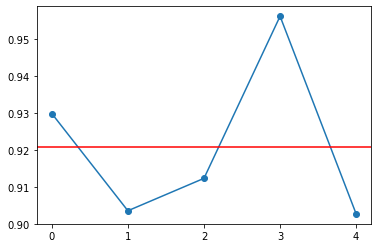

k: 3
	fold: 0, acc: 0.9473684210526315
	fold: 1, acc: 0.9385964912280702
	fold: 2, acc: 0.9122807017543859
	fold: 3, acc: 0.9736842105263158
	fold: 4, acc: 0.8849557522123894
	avg_acc: 0.9313771153547584



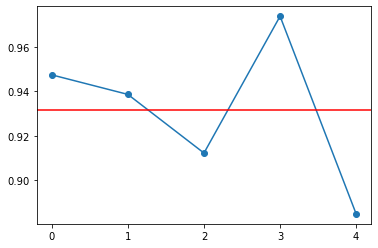

k: 5
	fold: 0, acc: 0.9473684210526315
	fold: 1, acc: 0.9473684210526315
	fold: 2, acc: 0.9385964912280702
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8761061946902655
	avg_acc: 0.9348703617450707



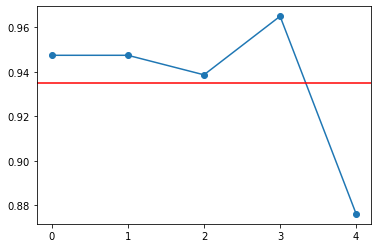

k: 7
	fold: 0, acc: 0.9736842105263158
	fold: 1, acc: 0.9298245614035088
	fold: 2, acc: 0.9298245614035088
	fold: 3, acc: 0.956140350877193
	fold: 4, acc: 0.8672566371681416
	avg_acc: 0.9313460642757334



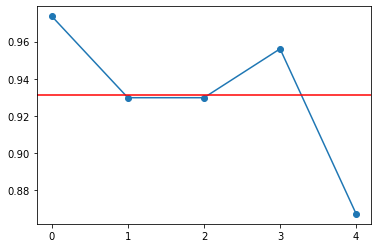

k: 9
	fold: 0, acc: 0.9649122807017544
	fold: 1, acc: 0.9385964912280702
	fold: 2, acc: 0.9473684210526315
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8672566371681416
	avg_acc: 0.9366092221704705



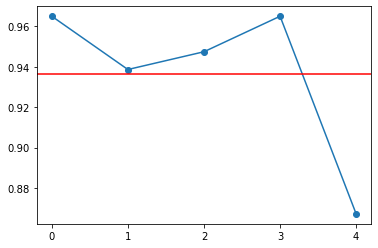

k: 11
	fold: 0, acc: 0.9736842105263158
	fold: 1, acc: 0.9385964912280702
	fold: 2, acc: 0.9385964912280702
	fold: 3, acc: 0.9736842105263158
	fold: 4, acc: 0.8672566371681416
	avg_acc: 0.9383636081353828



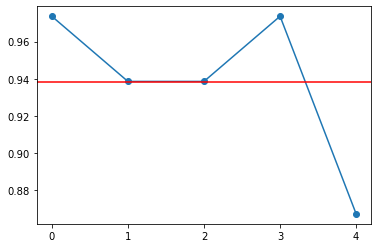

k: 13
	fold: 0, acc: 0.9649122807017544
	fold: 1, acc: 0.9210526315789473
	fold: 2, acc: 0.9385964912280702
	fold: 3, acc: 0.9736842105263158
	fold: 4, acc: 0.8761061946902655
	avg_acc: 0.9348703617450707



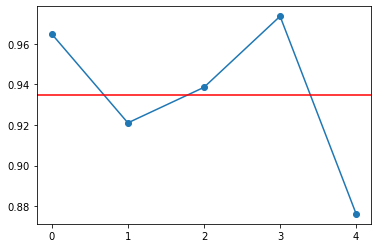

k: 15
	fold: 0, acc: 0.9385964912280702
	fold: 1, acc: 0.9298245614035088
	fold: 2, acc: 0.9210526315789473
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8761061946902655
	avg_acc: 0.9260984319205093



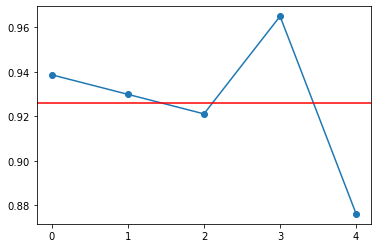

k: 17
	fold: 0, acc: 0.9473684210526315
	fold: 1, acc: 0.9298245614035088
	fold: 2, acc: 0.9210526315789473
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8761061946902655
	avg_acc: 0.9278528178854215



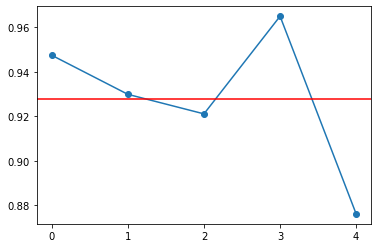

k: 19
	fold: 0, acc: 0.9385964912280702
	fold: 1, acc: 0.9298245614035088
	fold: 2, acc: 0.9210526315789473
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8849557522123894
	avg_acc: 0.9278683434249342



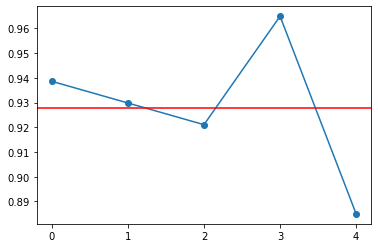

k: 21
	fold: 0, acc: 0.9385964912280702
	fold: 1, acc: 0.9298245614035088
	fold: 2, acc: 0.9210526315789473
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8938053097345132
	avg_acc: 0.9296382549293588



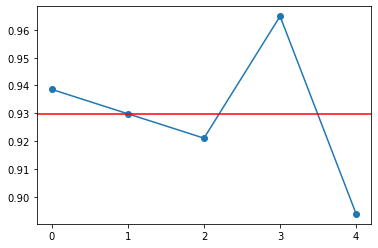

k: 23
	fold: 0, acc: 0.9385964912280702
	fold: 1, acc: 0.9298245614035088
	fold: 2, acc: 0.9122807017543859
	fold: 3, acc: 0.9649122807017544
	fold: 4, acc: 0.8938053097345132
	avg_acc: 0.9278838689644464



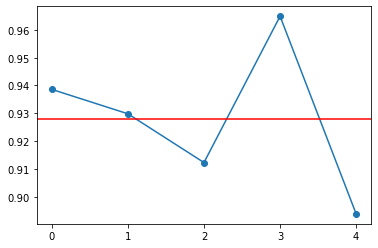

In [96]:
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle
import numpy as np
from math import sqrt, floor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


def get_train_validate_sets(X_folds, y_folds, folds_cnt, i):
    X_train = np.concatenate([X_folds[j] for j in range(folds_cnt) if j != i])
    y_train = np.concatenate([y_folds[j] for j in range(folds_cnt) if j != i])

    return (X_train, X_folds[i], y_train, y_folds[i])


def plot_folds_accuracies(folds_ids, folds_acc, avg_acc):
    plt.scatter(folds_ids, folds_acc)
    plt.plot(folds_ids, folds_acc)
    plt.axhline(y=avg_acc, color="r", linestyle="-")
    plt.xticks(folds_ids)
    plt.show()


X, y = load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y) # przetasowanie danych - dobra praktyka
n = y.size

folds_cnt = 5
folds_ids = [i for i in range(folds_cnt)]
X_folds = np.array_split(X, folds_cnt)
y_folds = np.array_split(y, folds_cnt)

n_sqrt = floor(sqrt(n))
for k in range(1, n_sqrt+1, 2): # tylko nieparzyste, żeby nie martwić się remisami
    folds_acc = [0]*folds_cnt
    print(f"k: {k}")

    for i in folds_ids:
        X_train, X_validate, y_train, y_validate = get_train_validate_sets(X_folds, y_folds, folds_cnt, i)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)

        y_true = y_validate
        y_pred = model.predict(X_validate)

        folds_acc[i] = calculate_accuracy(y_pred, y_true)
        print(f"\tfold: {i}, acc: {folds_acc[i]}")

    avg_acc = sum(folds_acc)/folds_cnt
    print(f"\tavg_acc: {avg_acc}\n")

    plot_folds_accuracies(folds_ids, folds_acc, avg_acc)

## Walidacja skrośna, metryki pomiaru jakości klasyfikatorów

Wykorzystamy teraz walidację skrośną ze Scikit-learn'a, aby automatycznie zyskać najlepszą wartość parametru k dla zbioru danych. Użyjemy zbioru Breast Cancer Wisconsin, który powinieneś/powinnaś był/a załadować w zadaniu 2. Sprawdzając różne k, wybierzemy takie, które daje największą średnią celność (używając zaimplementowanej przez ciebie funkcji) na zbiorach walidacyjnych. Na koniec sprawdzimy, konkretnie jak dużą precyzję daje to wybrane k.  

Uwaga: używamy tutaj funkcji cross_val_score, która jednocześnie przeprowadza walidację skrośną i zwraca uśredniony wynik wybranego sposobu pomiaru jakości klasyfikatora. Jest także dostępna np. funkcja KFold, która po prostu generuje kolejne foldy, po których można przechodzić pętlą for.

In [97]:
from sklearn.datasets import load_breast_cancer  # load dataset
from sklearn.metrics import accuracy_score  # automatic accuracy calculation
from sklearn.model_selection import cross_val_score  # cross validation with scores calculation


def get_best_k(X_train, y_train):
    best_k = -1
    best_score = -1
    X_rows_num = X.shape[0]  # .shape[0] for 2D matrix is it's rows number (number of samples), .shape[1] is number of columns (features)
    for k in range(1, int(np.sqrt(X_rows_num))):
        model = KNeighborsClassifier(n_neighbors=k)
        # cv=5 is the default value, we could omit it
        # error_score='raise' is here to suppress warnings
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
        mean_score = scores.mean()
        if mean_score > best_score:
            best_k = k
            best_score = mean_score
    return best_k


X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

best_k = get_best_k(X_train, y_train)
print("Best k:", best_k)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

Best k: 14
Accuracy: 0.958


### Zadanie 3

Na podstawie funkcji get_best_k stwórz funkcję, która będzie wizualizować wyniki dla różnych k na wykresie. Przetestuj ją dla zbioru Breast Cancer Wisconsin - najlepsza wartość k z wykresu powinna być taka sama, jak obliczona wyżej.

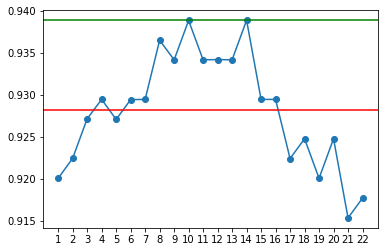

In [98]:
def plot_accuracy_for_k_values(X_train, y_train):
    X_rows_num = X.shape[0]  # .shape[0] for 2D matrix is it's rows number (number of samples), .shape[1] is number of columns (features)
    n = int(np.sqrt(X_rows_num))
    ks = list(range(1, n))
    mean_accuracies = np.zeros(n-1)

    for k in ks:
        model = KNeighborsClassifier(n_neighbors=k)
        # cv=5 is the default value, we could omit it
        # error_score='raise' is here to suppress warnings
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
        mean_accuracies[k-1] = scores.mean()

    plt.scatter(ks, mean_accuracies)
    plt.plot(ks, mean_accuracies)
    plt.axhline(y=mean_accuracies.mean(), color="r", linestyle="-")
    plt.axhline(y=mean_accuracies.max(), color="g", linestyle="-")
    plt.xticks(ks)
    plt.show()


plot_accuracy_for_k_values(X_train, y_train)

### Zadanie 4

Rozszerz funkcję get_best_k o argument scoring, który będzie napisem wskazującym na to, co chcemy mierzyć za pomocą walidacji skrośnej. Przetestuj, czy ta sama wartość k jest optymalna dla accuracy, precision, recall i F1.

In [99]:
from sklearn.metrics import SCORERS


def get_best_k(X_train, y_train, scoring_func_name):
    if scoring_func_name in SCORERS.keys():
        best_k = -1
        best_score = -1
        X_rows_num = X.shape[0]  # .shape[0] for 2D matrix is it's rows number (number of samples), .shape[1] is number of columns (features)
        for k in range(1, int(np.sqrt(X_rows_num))):
            model = KNeighborsClassifier(n_neighbors=k)
            # cv=5 is the default value, we could omit it
            # error_score='raise' is here to suppress warnings
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_func_name, error_score='raise')
            mean_score = scores.mean()
            if mean_score > best_score:
                best_k = k
                best_score = mean_score

        return (best_k, best_score)

    return (None, None)


def test_scoring(X_train, y_train, scoring_func_name):
    print(f"'{scoring_func_name}'", end=' ')
    best_k, best_score = get_best_k(X_train, y_train, scoring_func_name)

    if best_k is None:
        print("is an invalid scoring function's name")
    else:
        print(f"(best_k: {best_k}, best_score: {best_score})")


test_scoring(X_train, y_train, 'accuracy')
test_scoring(X_train, y_train, 'precision')
test_scoring(X_train, y_train, 'recall')
test_scoring(X_train, y_train, 'f1')
test_scoring(X_train, y_train, 'asdf')

'accuracy' (best_k: 14, best_score: 0.9388782489740082)
'precision' (best_k: 2, best_score: 0.9608234875953284)
'recall' (best_k: 15, best_score: 0.9737945492662472)
'f1' (best_k: 14, best_score: 0.9521869643879418)
'asdf' is an invalid scoring function's name


## Zbadanie klątwy wymiaru

Uwaga: poniższe ćwiczenie ze względu na dziwną strukturę zbioru jest dość czasochłonne. Ilustruje ważne zagadnienie, ale jest mniej ważne, niż samodzielna implementacja klasyfikatora kNN, która jest w następnym ćwiczeniu. Warto jednak to wykonać, jeżeli ma się czas, żeby zobaczyć, na czym dokładnie polega klątwa wymiaru i jak można ją zminimalizować.

Na dysku Google ściągnij zbiór "multiDimHypercubes.mat". Za pomocą biblioteki Scipy i poniższej funkcji wczytaj go (musi być w tym samym katalogu, co notebook), a następnie zapoznaj się z jego strukturą (jest dość nietypowa).

Sprawdź błąd klasyfikacji (1 - celność) metody 1-NN dla serii problemów klasyfikacyjnych w zależności od wymiarowości przestrzeni (liczby cech i). Stwórz wykres zależności błędu od wymiarowości przestrzeni i.

Oblicz, dla każdego i, średnią z odległości każdego przykładu testowego do najbliższego przykładu treningowego z danej klasy oraz do przykładu treningowego z klasy przeciwnej, oraz stosunek tych średnich, po czym przedstaw je na wykresiew zależności od i.

O czym to świadczy? Czy zmiana metryki na inną, wspieraną przez KNeighborsClassifier (patrz klasa DistanceMetric), np. Manhattan lub Mahalanobisa (to jest trochę bardziej tricky, trzeba obliczyć macierz kowariancji, odwrócić ją i przekazać jako argument), poprawia to?  
Uwaga: jeżeli dla metryki Mahalanobisa jakiegoś zbioru macierz kowariancji jest osobliwa (singular), to należy złapać błąd przez try/except i pominąć ten zbiór.

In [100]:
from scipy.io import loadmat

def load_hypercubes():
    data = loadmat("hypercubes.mat")
    X_train = data['featuresTrain'][0]
    X_test = data['featuresTest'][0]
    y_train = data['classesTrain'][0]
    y_test = data['classesTest'][0]
    max_dimensions = data['maxDim'][0][0]
    return X_train, X_test, y_train, y_test, max_dimensions

In [101]:
# write code!

## Samodzielna implementacja klasyfikatora kNN

Napisz klasę KNNClassifier, która:
- w konstruktorze będzie przyjmować argument k o wartości domyślnej 1
- będzie posiadała metodę .fit(X, y), w której będzie tworzyć k-d tree (użyj implementacji ze Scikit-learn) na podstawie danych; zastanów się, co zrobić z tym, że KDTree trzyma tylko wektory X, a nie wartości klas (podpowiedź: co zwraca metoda .query(X, k) dla tej klasy?)
- będzie posiadała metodę .predict(X), która dokona predykcji dla przekazanej macierzy punktów

In [103]:
from sklearn.neighbors import KDTree
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.model_selection import train_test_split


class KNNClassifier:
    def __init__(self, k=1, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        self.kd_tree = KDTree(X, metric=self.metric)
        # print(self.kd_tree.valid_metrics) # wyświetla możliwe metryki
        self.y = y

        if self.k == 'auto':
            self.k = get_best_k(X, y, 'accuracy')[0]
            print(f'k was set to auto, adjusted its value to {self.k}')

    def predict(self, X):
        res = []
        ids = self.kd_tree.query(X, k=self.k, return_distance=False) # szukamy k najbliższych sąsiadów

        for curr_ids in ids:
            counter = Counter(self.y[_id] for _id in curr_ids) # zliczamy wystąpienia klas
            prediction = counter.most_common()[0][0] # wybieramy najczęściej występującą klasę
            res.append(prediction)

        return np.asarray(res)

    # wybrałem wagę 1/dist
    def predict_weighted(self, X):
        res = []
        dists, ids = self.kd_tree.query(X, k=self.k) # szukamy k najbliższych sąsiadów

        for i in range(len(ids)):
            scores = {}
            for j in range(len(ids[i])):
                score = 1/max(dists[i][j], 10**(-27)) # max rozwiązuje problem gdy mamy doczynienia z dists[i] = 0
                try:
                    scores[self.y[ids[i][j]]] += score
                except KeyError:
                    scores[self.y[ids[i][j]]] = score

            prediction = max(scores, key=scores.get) # wybieramy najczęściej występującą klasę
            res.append(prediction)

        return np.asarray(res)


# knn_classifier = KNNClassifier(k='auto')
knn_classifier = KNNClassifier(k=100) # dobry przykład, dla którego precyzja ważona jest znacznie większa od domyślnej
# knn_classifier = KNNClassifier(k=70, metric='chebyshev')
# knn_classifier = KNNClassifier(k=70, metric='manhattan')
# knn_classifier = KNNClassifier(k=70, metric='infinity')

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(f'uniform accuracy: {calculate_accuracy(y_pred, y_test)}')

y_pred_w = knn_classifier.predict_weighted(X_test)
print(f'weighted accuracy: {calculate_accuracy(y_pred_w, y_test)}')

uniform accuracy: 0.6052631578947368
weighted accuracy: 0.9736842105263158
